# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Data Science skills!

## Data and Setup

____
** Import numpy and pandas **

In [1]:
import numpy as np, pandas as pd

** Import visualization libraries and set %matplotlib inline. **

In [2]:
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

** Read in the csv file as a dataframe called df **

In [3]:
df = pd.read_csv('911.csv')

** Check the info() of the df **

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Check the head of df **

In [5]:
df.head()

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title            timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY  2015-12-10 17:40:00        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY  2015-12-10 17:40:00  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK  2015-12-10 17:40:00         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY  2015-12-10 17:40:01         NORRISTOWN   
4      NaN           EMS: DIZZINESS  2015-12-10 17:40:01   LOWER POTTSGROVE   

                         addr  e  
0      REINDEER CT & DEAD END  1  
1  BRIAR PATH & WHITEMARSH LN  1  
2                    HAWS AVE  1  
3          AIRY ST & SWEDE ST  1  
4    CHERRYWOOD CT & DEAD END  1

## Basic Questions

** What are the top 5 zipcodes for 911 calls? **

In [6]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

In [7]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** Take a look at the 'title' column, how many unique title codes are there? **

In [8]:
df['title'].nunique()

110

In [9]:
df['lat'].round(1).value_counts()

40.1    42680
40.2    32735
40.3    13395
40.0     8739
40.4     1912
40.5       22
40.6        4
39.7        2
30.3        1
32.4        1
41.2        1
Name: lat, dtype: int64

In [10]:
df['lng'].round(1).value_counts()

-75.3    32054
-75.1    16904
-75.4    16138
-75.2    15447
-75.5     8965
-75.6     7287
-75.7     2155
-75.0      527
-77.7       10
-84.4        2
-76.9        1
-95.6        1
-86.3        1
Name: lng, dtype: int64

In [11]:
df['latlng'] = [', '.join(str(x) for x in y) for y in map(tuple, df[['lat', 'lng']].values.round(2))]

In [12]:
df.head()

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title            timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY  2015-12-10 17:40:00        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY  2015-12-10 17:40:00  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK  2015-12-10 17:40:00         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY  2015-12-10 17:40:01         NORRISTOWN   
4      NaN           EMS: DIZZINESS  2015-12-10 17:40:01   LOWER POTTSGROVE   

                         addr  e         latlng  
0      REINDEER CT & DEAD END  1   40.3, -75.58  
1  BRIAR PATH & WHITEMARSH LN  1  40.26, -75.26  
2                    HAWS AVE  1  40.12, -75.35  
3          AIRY ST & SWEDE ST  1  40.12, -75.34  
4    CHERRYWOOD CT & DEAD END  1   40.25, -75.6

In [13]:
df['latlng'].value_counts()

40.1, -75.38     1590
40.12, -75.34    1476
40.12, -75.35    1257
40.25, -75.65    1174
40.23, -75.39    1013
                 ... 
40.17, -75.54       1
40.17, -75.41       1
40.3, -75.22        1
40.45, -75.55       1
40.24, -75.43       1
Name: latlng, Length: 1563, dtype: int64

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [14]:
df['reason'] = df['title'].apply(lambda x:x.split(':')[0])
df.head()
df['reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

** What is the most common Reason for a 911 call based off of this new column? **

** Now use seaborn to create a countplot of 911 calls by Reason. **

<AxesSubplot:xlabel='reason', ylabel='count'>

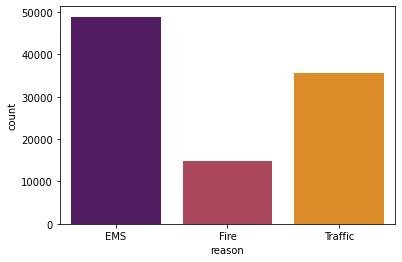

In [15]:
sns.countplot(x=df['reason'], palette='inferno')

___
** Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? **

In [16]:
type(df['timeStamp'])

pandas.core.series.Series

** You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects. **

In [17]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

** You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**

In [18]:
dmap = {0: 'Mon', 1:'Tues', 3:'Wed', 4:'Thur', 5:'Fri', 6:'Sat', 7:'Sun'}
df['month'] = df['timeStamp'].apply(lambda x:x.month)
df['hour'] = df['timeStamp'].apply(lambda x:x.hour)
df['DOW'] = df['timeStamp'].apply(lambda x:x.dayofweek).map(dmap)

In [19]:
df.head()

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title           timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY 2015-12-10 17:40:00        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY 2015-12-10 17:40:00  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK 2015-12-10 17:40:00         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY 2015-12-10 17:40:01         NORRISTOWN   
4      NaN           EMS: DIZZINESS 2015-12-10 17:40:01   LOWER POTTSGROVE   

                         addr  e         latlng reason  month  hour  DOW  
0      REINDEER CT & DEAD END  1   40.3, -75.58    EMS     12    17  Wed  
1  BRIAR PATH & WHITEMARSH LN  1  40.26, -75.26    EMS     12    17  Wed  
2                    HAWS AVE  1  40.12, -75.35   Fire     12    17  Wed  
3          AIRY ST & SWEDE ST  1  40.12, -75.34    EMS     12    17  Wed  
4    CHERRYWOOD CT & DEAD END  1   40.25, -75.6    EMS     12    17  Wed

** Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

In [20]:
sns.set_theme(style="whitegrid", context="notebook", )

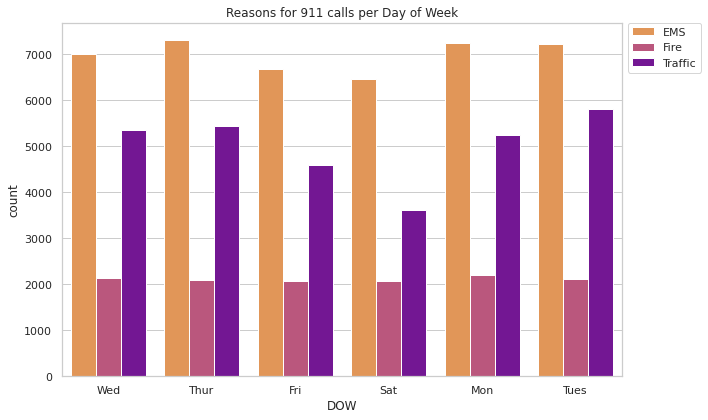

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(x="DOW", hue="reason", data=df, palette='plasma_r')
# place the legend outside the figure/plot
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title("Reasons for 911 calls per Day of Week")
plt.tight_layout()

**Now do the same for Month:**

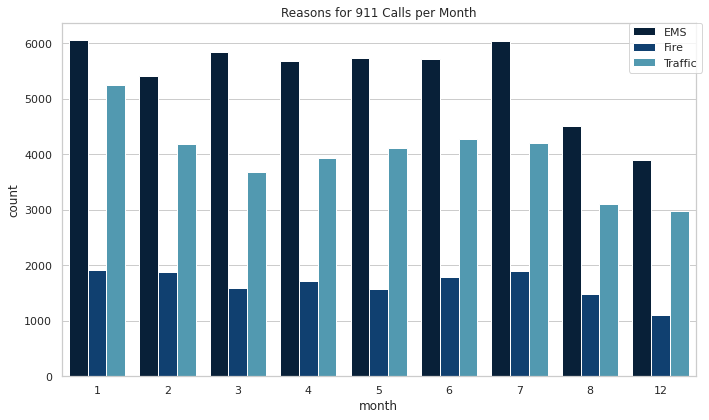

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'month', data = df, hue='reason', palette = 'ocean')
plt.legend(bbox_to_anchor = (1.01, 1), borderaxespad=0)
plt.title('Reasons for 911 Calls per Month')
plt.tight_layout()

**Did you notice something strange about the Plot?**

_____

** You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas... **

In [23]:
df['month'].value_counts()

1     13205
7     12137
6     11786
2     11467
5     11423
4     11326
3     11101
8      9078
12     7969
Name: month, dtype: int64

Interestingly there seems to be no data for months 9 thru 11.

** Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

In [24]:
byMonth = df.groupby('month').count()

In [25]:
byMonth.head()

lat    lng   desc    zip  title  timeStamp    twp   addr      e  \
month                                                                      
1      13205  13205  13205  11527  13205      13205  13203  13096  13205   
2      11467  11467  11467   9930  11467      11467  11465  11396  11467   
3      11101  11101  11101   9755  11101      11101  11092  11059  11101   
4      11326  11326  11326   9895  11326      11326  11323  11283  11326   
5      11423  11423  11423   9946  11423      11423  11420  11378  11423   

       latlng  reason   hour    DOW  
month                                
1       13205   13205  13205  11505  
2       11467   11467  11467   9564  
3       11101   11101  11101   9212  
4       11326   11326  11326   9809  
5       11423   11423  11423   9885

** Now create a simple plot off of the dataframe indicating the count of calls per month. **

<AxesSubplot:xlabel='month', ylabel='title'>

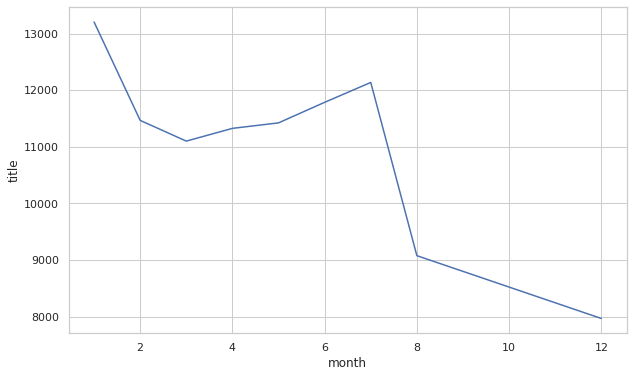

In [26]:
plt.figure(figsize=(10,6))
sns.lineplot(x='month', y='title', data = byMonth)

** Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column. **

<Figure size 720x4320 with 0 Axes>

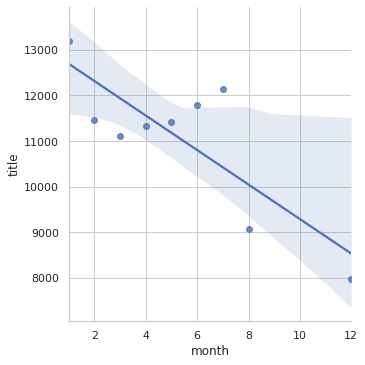

In [27]:
plt.figure(figsize=(10,60))
sns.lmplot(x='month', y='title', data = byMonth.reset_index())

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. ** 

In [28]:
df['date'] = df['timeStamp'].apply(lambda x:x.date())

In [29]:
df.head()

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title           timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY 2015-12-10 17:40:00        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY 2015-12-10 17:40:00  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK 2015-12-10 17:40:00         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY 2015-12-10 17:40:01         NORRISTOWN   
4      NaN           EMS: DIZZINESS 2015-12-10 17:40:01   LOWER POTTSGROVE   

                         addr  e         latlng reason  month  hour  DOW  \
0      REINDEER CT & DEAD END  1   40.3, -75.58    EMS     12    17  Wed   
1  BRIAR PATH & WHITEMARSH LN  1  40.26, -75.26    EMS     12    17  Wed   
2                    HAWS AVE  1  40.12, -75.35   Fire     12    17  Wed   
3          AIRY ST & SWEDE ST  1  40.12, -75.34    EMS     12    17  Wed   
4    CHERRYWOOD CT & DEAD END  1   40.25, -75.6    EMS     12    17  Wed   

         date  
0  2015-12-10  
1  2015-12-10  
2  2015-12-10  
3  2015-12-10  
4  2015-12-10

** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

Text(0.5, 1.0, 'call volume by date')

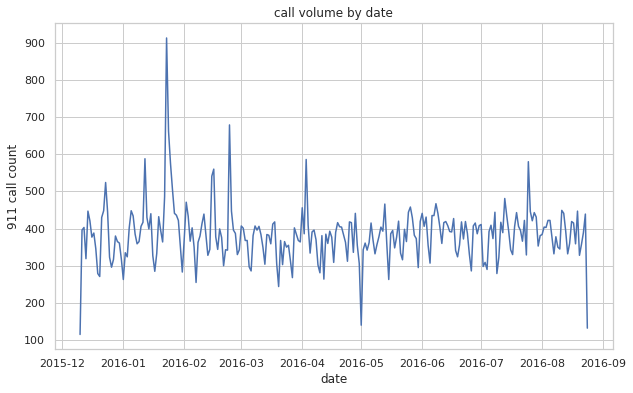

In [30]:
byDate = df.groupby('date').count()
plt.figure(figsize=(10,6))
sns.lineplot(x='date', y='title', data=byDate)
plt.xlabel('date')
plt.ylabel('911 call count')
plt.title('call volume by date')

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

Text(0.5, 1.0, 'ems')

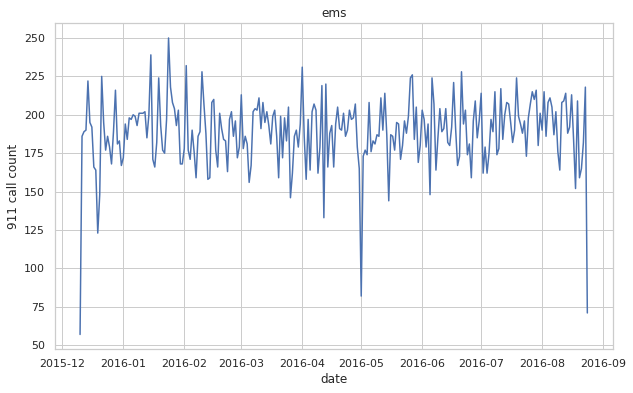

In [31]:
date_ems = df[df['reason']=='EMS'].groupby('date').count()
plt.figure(figsize=(10,6))
sns.lineplot(x='date', y='title', data=date_ems)
plt.xlabel('date')
plt.ylabel('911 call count')
plt.title('ems')

Text(0.5, 1.0, 'traffic')

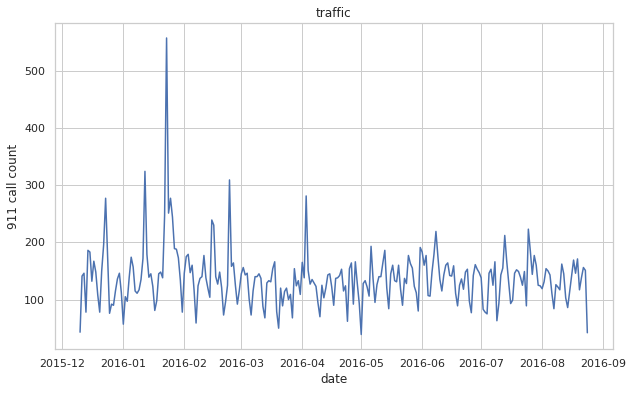

In [32]:
date_traffic = df[df['reason']=='Traffic'].groupby('date').count()
plt.figure(figsize=(10,6))
sns.lineplot(x='date', y='title', data=date_traffic)
plt.xlabel('date')
plt.ylabel('911 call count')
plt.title('traffic')

Text(0.5, 1.0, 'fire')

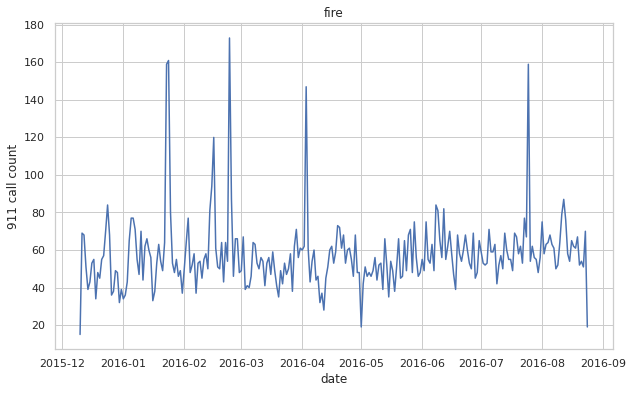

In [33]:
date_fire = df[df['reason']=='Fire'].groupby('date').count()
plt.figure(figsize=(10,6))
sns.lineplot(x='date', y='title', data=date_fire)
plt.xlabel('date')
plt.ylabel('911 call count')
plt.title('fire')

____
** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

In [34]:
dayHour = df.groupby(['DOW', 'hour']).count()['reason'].unstack()
dayHour

hour   0    1    2    3    4    5    6    7    8    9   ...   14   15    16  \
DOW                                                     ...                   
Fri   375  301  263  260  224  231  257  391  459  640  ...  789  796   848   
Mon   282  221  201  194  204  267  397  653  819  786  ...  869  913   989   
Sat   383  306  286  268  242  240  300  402  483  620  ...  684  691   663   
Thur  275  235  191  175  201  194  372  598  742  752  ...  932  980  1039   
Tues  269  240  186  170  209  239  415  655  889  880  ...  943  938  1026   
Wed   278  202  233  159  182  203  362  570  777  828  ...  876  969   935   

hour    17   18   19   20   21   22   23  
DOW                                       
Fri    757  778  696  628  572  506  467  
Mon    997  885  746  613  497  472  325  
Sat    714  670  655  537  461  415  330  
Thur   980  820  696  667  559  514  474  
Tues  1019  905  731  647  571  462  274  
Wed   1013  810  698  617  553  424  354  

[6 rows x 24 columns]

** Now create a HeatMap using this new DataFrame. **

Text(66.5, 0.5, 'day of the week')

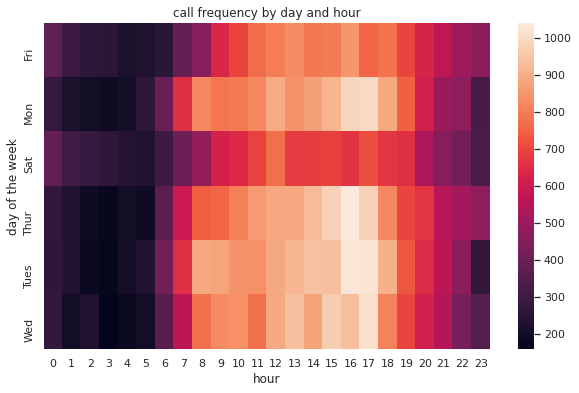

In [35]:
plt.figure(figsize=(10,6))
sns.heatmap(dayHour)
plt.title('call frequency by day and hour')
plt.xlabel('hour')
plt.ylabel('day of the week')

** Now create a clustermap using this DataFrame. **

Text(0.5, 1.0, 'call frequency by day and hour')

<Figure size 720x432 with 0 Axes>

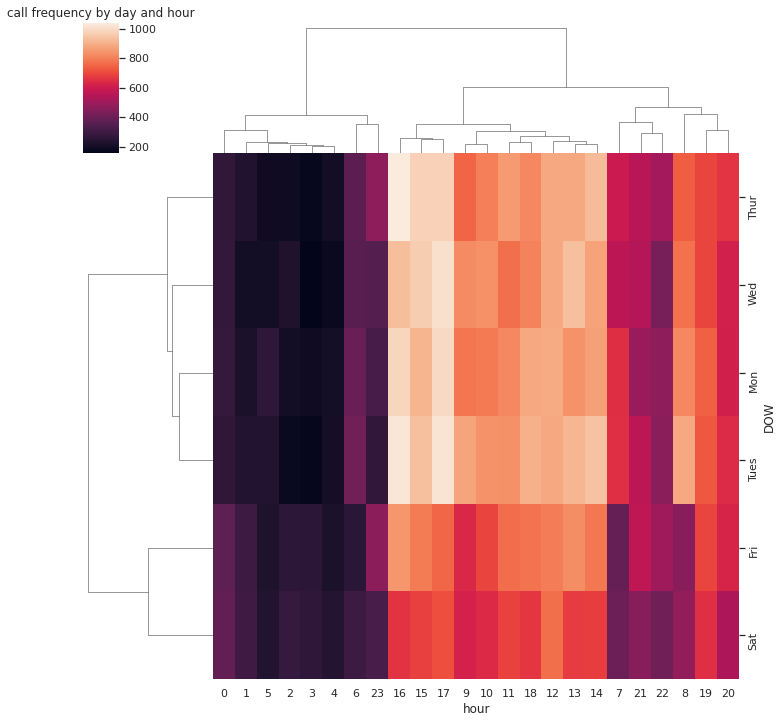

In [36]:
plt.figure(figsize=(10,6))
sns.clustermap(dayHour)
plt.title('call frequency by day and hour')

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [37]:
monthHour = df.groupby(['month', 'hour']).count()['reason'].unstack()
monthHour

hour    0    1    2    3    4    5    6    7    8    9   ...   14   15   16  \
month                                                    ...                  
1      294  218  225  205  205  214  386  551  755  752  ...  775  691  725   
2      267  194  161  149  161  213  325  550  597  603  ...  648  704  692   
3      214  181  194  149  152  181  291  487  556  614  ...  672  707  782   
4      243  204  170  161  179  178  316  482  613  598  ...  705  728  767   
5      255  195  158  173  160  196  254  439  605  644  ...  640  746  728   
6      229  192  168  157  148  172  290  436  565  630  ...  726  767  817   
7      241  224  181  188  177  196  279  431  545  635  ...  791  744  815   
8      219  182  166  135  131  144  188  326  466  465  ...  552  612  656   
12     150  131  126  118  105  135  184  268  342  373  ...  488  455  508   

hour    17   18   19   20   21   22   23  
month                                     
1      871  798  687  592  507  421  345  
2      674  693  578  518  453  426  327  
3      676  600  547  493  402  359  273  
4      728  646  533  472  377  309  282  
5      787  608  510  489  462  405  283  
6      769  693  563  496  456  399  306  
7      826  675  652  583  481  433  292  
8      564  476  419  373  345  245  247  
12     622  573  419  361  305  286  204  

[9 rows x 24 columns]

Text(66.5, 0.5, 'month')

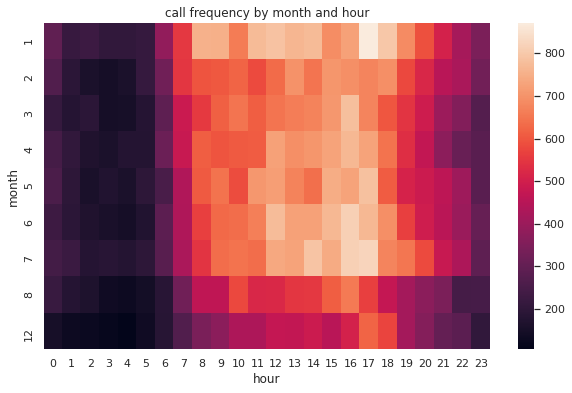

In [38]:
plt.figure(figsize=(10,6))
sns.heatmap(monthHour)
plt.title('call frequency by month and hour')
plt.xlabel('hour')
plt.ylabel('month')

Text(0.5, 1.0, 'call frequency by month and hour')

<Figure size 720x432 with 0 Axes>

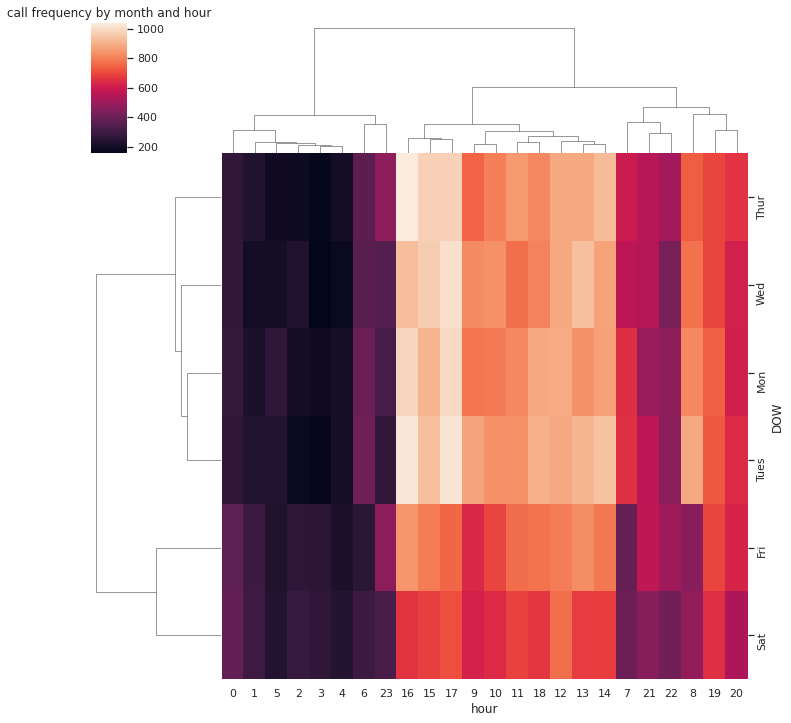

In [39]:
plt.figure(figsize=(10,6))
sns.clustermap(dayHour)
plt.title('call frequency by month and hour')

**Continue exploring the Data however you see fit!**
# Great Job!

In [40]:
df['latlng'].nunique()

1563

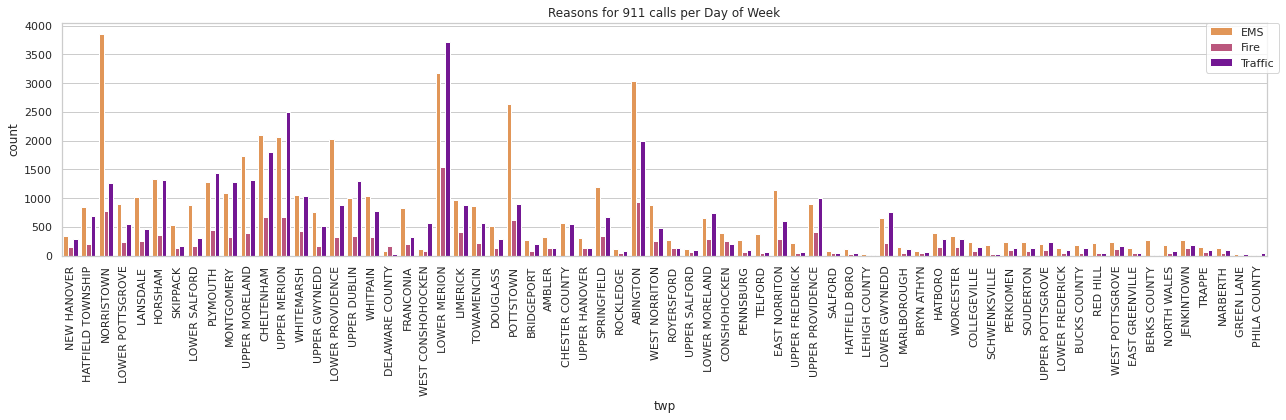

In [41]:
plt.figure(figsize=(18,6))
sns.countplot(x="twp", hue="reason", data=df, palette='plasma_r')
# place the legend outside the figure/plot
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title("Reasons for 911 calls per Day of Week")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('911Call_reasons_township.png')

In [42]:
monthDay = df.groupby(['month', 'DOW']).count()['reason'].unstack()
monthDay

DOW     Fri   Mon   Sat  Thur  Tues   Wed
month                                    
1      2291  1727  1960  1970  1973  1584
2      1441  1964  1229  1581  1753  1596
3      1266  1535  1102  1525  1884  1900
4      1734  1598  1488  1958  1430  1601
5      1444  1779  1424  1730  1918  1590
6      1388  1617  1333  1649  1676  2065
7      1695  1692  1672  2045  1670  1646
8      1099  1511  1021  1310  1612  1230
12      978  1257   907  1065  1234  1266

In [56]:
df.head()

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title           timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY 2015-12-10 17:40:00        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY 2015-12-10 17:40:00  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK 2015-12-10 17:40:00         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY 2015-12-10 17:40:01         NORRISTOWN   
4      NaN           EMS: DIZZINESS 2015-12-10 17:40:01   LOWER POTTSGROVE   

                         addr  e         latlng reason  month  hour  DOW  \
0      REINDEER CT & DEAD END  1   40.3, -75.58    EMS     12    17  Wed   
1  BRIAR PATH & WHITEMARSH LN  1  40.26, -75.26    EMS     12    17  Wed   
2                    HAWS AVE  1  40.12, -75.35   Fire     12    17  Wed   
3          AIRY ST & SWEDE ST  1  40.12, -75.34    EMS     12    17  Wed   
4    CHERRYWOOD CT & DEAD END  1   40.25, -75.6    EMS     12    17  Wed   

         date  
0  2015-12-10  
1  2015-12-10  
2  2015-12-10  
3  2015-12-10  
4  2015-12-10

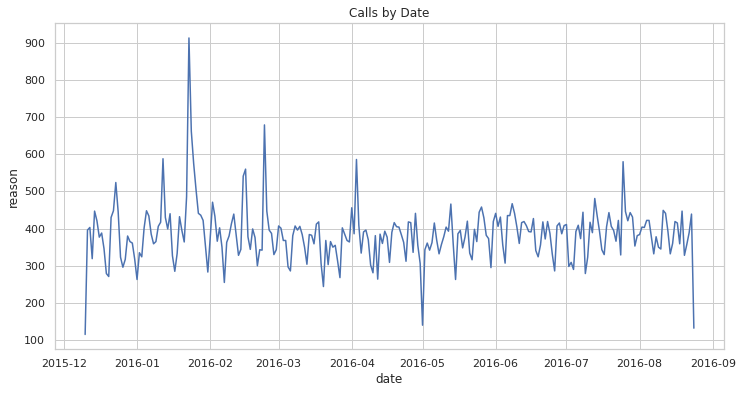

In [55]:
plt.figure(figsize=(12,6))
sns.lineplot(x='date', y='reason', data = byDate)
plt.title('Calls by Date')
plt.ylabel=('call volume')

In [ ]:
df['specific_EMS'] = df[df['reason']=='EMS']['title'].apply(lambda title:title.split(': ')[1])

<AxesSubplot:>

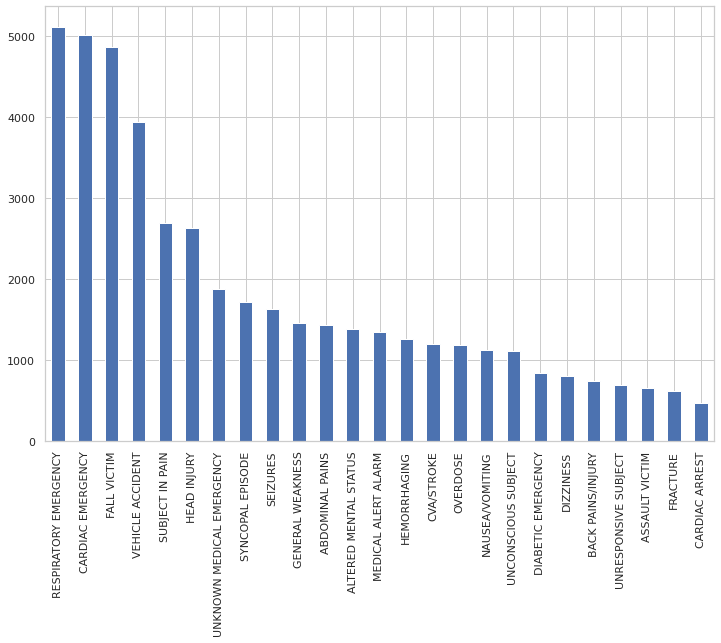

In [173]:
plt.figure(figsize=(12,8))
df[df['reason']=='EMS']['specific_EMS'].value_counts()[:25].plot(kind='bar')

<AxesSubplot:>

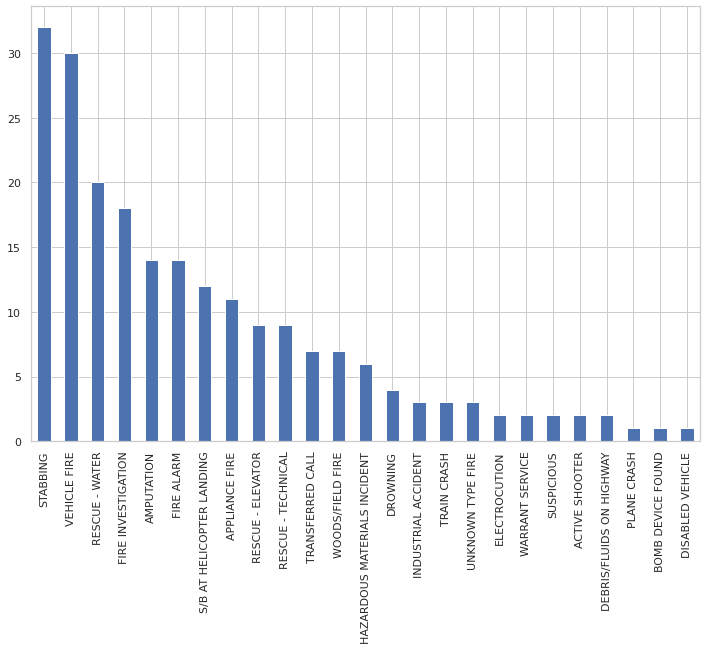

In [174]:
plt.figure(figsize=(12,8))
df[df['reason']=='EMS']['specific_EMS'].value_counts()[-25:].plot(kind='bar')

In [169]:
df[df['specific_EMS']=='OVERDOSE'].groupby('twp')['title'].count().sort_values(ascending=False)

twp
NORRISTOWN        118
POTTSTOWN         114
UPPER MORELAND     74
LOWER MERION       62
ABINGTON           54
                 ... 
SALFORD             1
HATFIELD BORO       1
BUCKS COUNTY        1
UPPER SALFORD       1
MARLBOROUGH         1
Name: title, Length: 65, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'NORRISTOWN'),
  Text(1, 0, 'POTTSTOWN'),
  Text(2, 0, 'UPPER MORELAND'),
  Text(3, 0, 'LOWER MERION'),
  Text(4, 0, 'ABINGTON'),
  Text(5, 0, 'LANSDALE'),
  Text(6, 0, 'UPPER MERION'),
  Text(7, 0, 'CHELTENHAM'),
  Text(8, 0, 'PLYMOUTH'),
  Text(9, 0, 'LOWER PROVIDENCE'),
  Text(10, 0, 'HORSHAM'),
  Text(11, 0, 'WEST NORRITON'),
  Text(12, 0, 'CHESTER COUNTY'),
  Text(13, 0, 'EAST NORRITON'),
  Text(14, 0, 'UPPER PROVIDENCE'),
  Text(15, 0, 'LIMERICK'),
  Text(16, 0, 'SPRINGFIELD'),
  Text(17, 0, 'TOWAMENCIN'),
  Text(18, 0, 'DOUGLASS'),
  Text(19, 0, 'WHITPAIN'),
  Text(20, 0, 'SKIPPACK'),
  Text(21, 0, 'UPPER DUBLIN'),
  Text(22, 0, 'LOWER POTTSGROVE'),
  Text(23, 0, 'LOWER SALFORD'),
  Text(24, 0, 'AMBLER')])

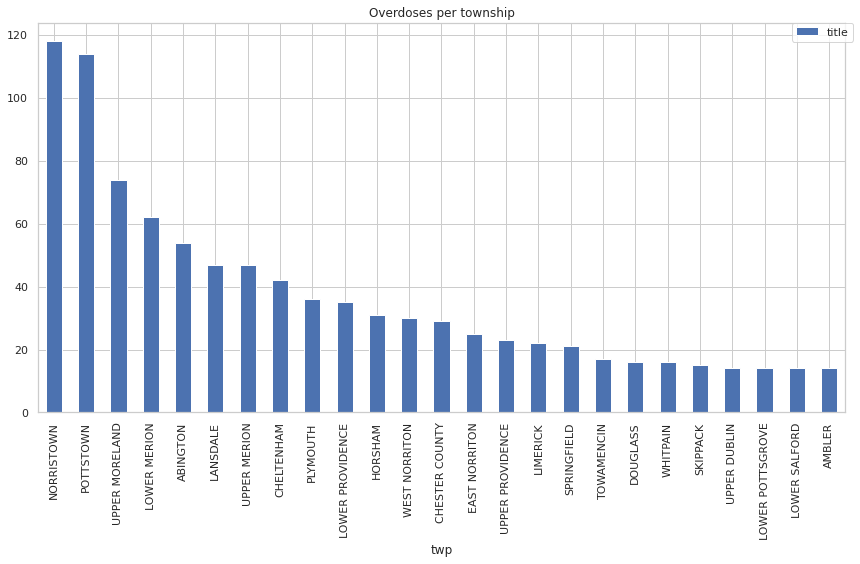

In [171]:
plt.figure(figsize=(12,8))
df[df['specific_EMS']=='OVERDOSE'].groupby('twp')['title'].count().sort_values(ascending=False)[:25].plot(kind='bar')
plt.title('Overdoses per township')
plt.xlabel=('Township')
plt.ylabel=('Number of Overdoses')
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'NORRISTOWN'),
  Text(1, 0, 'POTTSTOWN'),
  Text(2, 0, 'CHELTENHAM'),
  Text(3, 0, 'UPPER MORELAND'),
  Text(4, 0, 'PLYMOUTH'),
  Text(5, 0, 'ABINGTON'),
  Text(6, 0, 'UPPER DUBLIN'),
  Text(7, 0, 'ROYERSFORD'),
  Text(8, 0, 'LOWER GWYNEDD'),
  Text(9, 0, 'LANSDALE'),
  Text(10, 0, 'EAST NORRITON')])

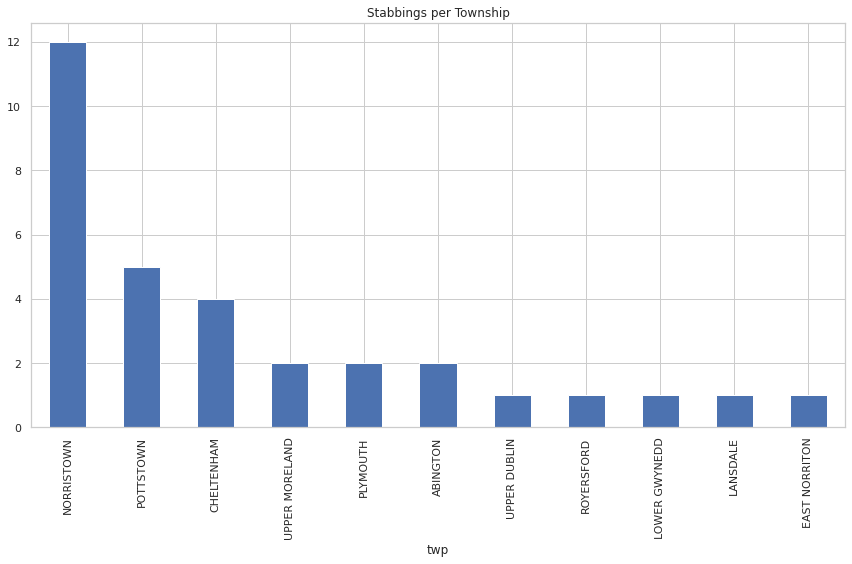

In [172]:
plt.figure(figsize=(12,8))
df[df['specific_EMS']=='STABBING'].groupby('twp')['title'].count().sort_values(ascending=False).plot(kind='bar')
plt.title('Stabbings per Township')
plt.xlabel=('Township')
plt.ylabel=('Number of Stabbings')
plt.tight_layout()
plt.xticks(rotation=90)